# Shifting Carrier to the Software Industry

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>

> #### _`QS:`_ People from different backgrounds shift to the software industry, how they do so? 




## Imports


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Data Exploration</h1></div>

## Read the Education data

In [112]:
education_df = pd.read_csv('../data/preprocessed-data/normalized csv/educations.csv')
print(education_df.shape)
education_df.head()

(1097, 6)


,University,Degree,Date,User,university_name,faculty_name
0,information technology institute (iti),nov 2021 - jun 2022,NaN,%D9%90%D9%90amiraelmergawy,#iti,NaN
1,ain shams university,"bachelor's degree, computer science",2016 - 2020,%D9%90%D9%90amiraelmergawy,ain shams,computer
2,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,-ezz,#iti,NaN
3,al-azhar university,geophysics and seismology,Sep 2015 - Aug 2019,-ezz,azhar,science
4,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,1212mohamedtaha,NaN,petroleum


## Read the Experiences data

In [113]:
experience_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
print(experience_df.shape)
experience_df.head()

(3403, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/294614/,Information Technology Institute (ITI),teaching assistant,Full-time,2022-08-01,Present,9.0,Egypt,teaching
1,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/15805726/,National Telecommunication Institute (NTI),mean stack developer,Internship,2020-11-01,Jan 2021,3.0,NaN,full-stack
2,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/18305384/,الجهاز المركزي للتعبئة العامة و الاحصاء,software developer,Internship,2019-07-01,NaN,1.0,"Cairo, Egypt",software
3,%D9%90%D9%90amiraelmergawy,https://www.linkedin.com/company/2205041/,(ISCC) Information Systems and Computers Center,software developer,Internship,2018-08-01,NaN,1.0,"Cairo, Egypt",software
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software


## Filter Undergrads

In [114]:
experience_df = experience_df[(experience_df['title_tag'] != 'internship') & (experience_df['EmploymentType'] != 'Internship')]
experience_df = experience_df[(experience_df['title_tag'] != 'student')]
experience_df = experience_df[(experience_df['title_tag'] != 'teaching')]
print(experience_df.shape)
experience_df.head()

(2673, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,NaN
10,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",software


## Get the First Job of each User

In [115]:
# every user has one job
experience_df = experience_df.groupby('User').first().reset_index()
print(experience_df.shape)

experience_df.head()

(820, 10)


,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software
1,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",data
2,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",software
3,a-mohsen,https://www.linkedin.com/company/10590015/,ItsaCheckmate,software tech lead,Freelance,2022-08-01,Present,9.0,Egypt,Lead
4,a-nan-farag-b78a0b12b,https://www.linkedin.com/company/235489/,KnowledgeNet,senior java developer,Full-time,2021-05-01,Present,24.0,"Cairo, Egypt",software


## Get the experience of each user with & without ITI

In [116]:
# create a set of user who have iti in their education or in experience
tmp_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
iti_users = set(education_df[education_df['university_name'] == '#iti']['User'].unique())
iti_users.update(set(tmp_df[tmp_df['Company'].str.contains('\(ITI\)')]['User'].unique()))
iti_users = list(iti_users)
len(iti_users)

154

In [117]:
# Get the users who have iti in their education
education_df_with_iti = education_df[education_df['User'].isin(iti_users)]

# remove iti from education
# create education_df_with_iti with the difference between education_df and education_df_without_iti
education_df_without_iti = education_df[~education_df.isin(education_df_with_iti)].dropna()

# get first education
education_df_without_iti = education_df_without_iti.groupby('User').first().reset_index()
education_df_with_iti = education_df_with_iti.groupby('User').first().reset_index()

# join education and experience
working_without_iti_df = pd.merge(education_df_without_iti, experience_df, on='User', how='inner')
print("working_without_iti_df", working_without_iti_df.shape)

working_with_iti_df = pd.merge(education_df_with_iti, experience_df, on='User', how='inner')
print("working_with_iti_df", working_with_iti_df.shape)

working_df = pd.concat([working_without_iti_df, working_with_iti_df])
print("working_df", working_df.shape)

education_df_with_iti.head()


working_without_iti_df (572, 15)
working_with_iti_df (143, 15)
working_df (715, 15)


,User,University,Degree,Date,university_name,faculty_name
0,%D9%90%D9%90amiraelmergawy,information technology institute (iti),nov 2021 - jun 2022,2016 - 2020,#iti,computer
1,-ezz,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,#iti,science
2,1212mohamedtaha,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,None,petroleum
3,3omarbadr,information technology institute (iti),php full stack diploma,Mar 2021 - Aug 2021,#iti,computer
4,aabdelsattaar,information technology institute (iti),"deploma, unix department",2007 - 2008,#iti,art


## What is the background education of the people who shifted their carrier?

shifted_with_iti_df (48, 15)
electronic         21
art                 7
science             4
mechatronic         4
did not specify     3
petroleum           2
biomedical          2
power               2
language            1
mechanical          1
civil               1
Name: faculty_name, dtype: int64


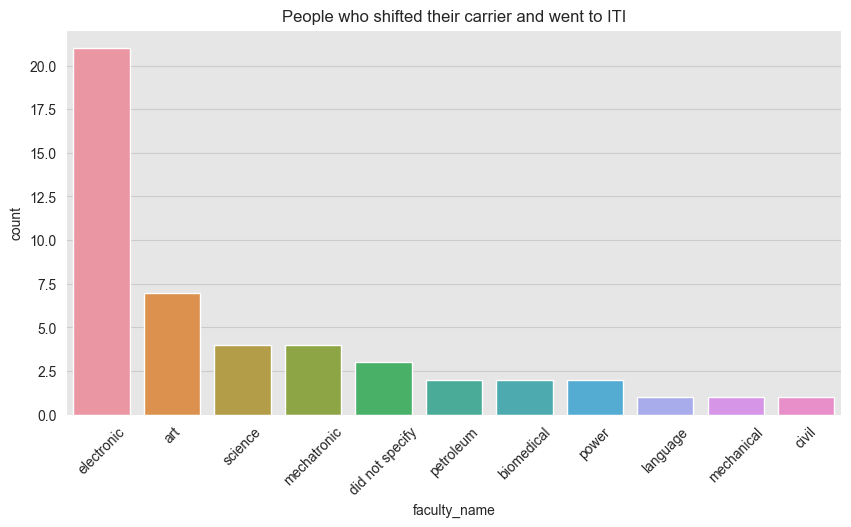

shifted_without_iti_df (109, 15)
electronic     63
commerce        9
mechatronic     7
biomedical      7
language        5
power           4
science         4
mechanical      4
law             2
civil           2
petroleum       1
art             1
Name: faculty_name, dtype: int64


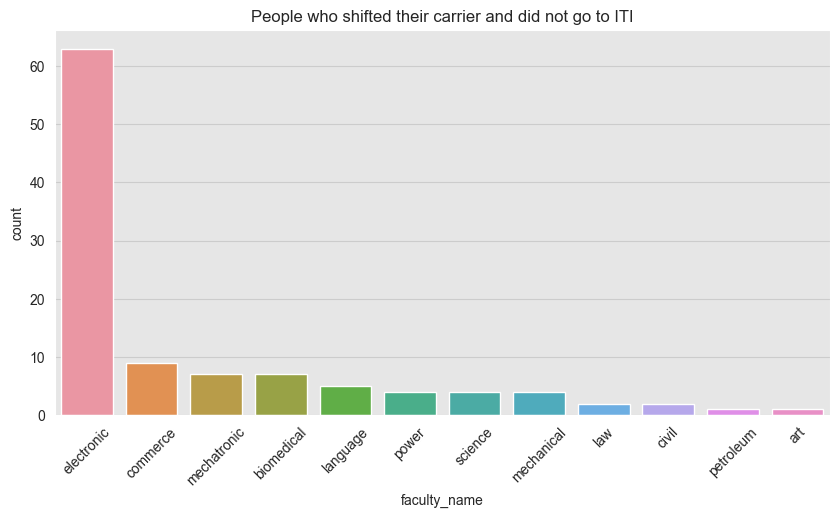

In [118]:
related_faculties = [
    'computer',
    'computing',
    # 'electronic',
    # 'biomedical',
    # 'mechatronic',
    'engineering',
]

# fill Nan faculty_name
working_without_iti_df['faculty_name'] = working_without_iti_df['faculty_name'].fillna('did not specify')
working_with_iti_df['faculty_name'] = working_with_iti_df['faculty_name'].fillna('did not specify')


# Get the people who shifted their carrier and went to ITI
shifted_with_iti_df = working_with_iti_df[~working_with_iti_df['faculty_name'].isin(related_faculties)]
print("shifted_with_iti_df", shifted_with_iti_df.shape)
print(shifted_with_iti_df['faculty_name'].value_counts())
# plot People who shifted their carrier and went to ITI'
plt.figure(figsize=(10, 5))
sns.countplot(x='faculty_name', data=shifted_with_iti_df, order=shifted_with_iti_df['faculty_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('People who shifted their carrier and went to ITI')
plt.show()

# Get the people who shifted their carrier and did not go to ITI
shifted_without_iti_df = working_without_iti_df[~working_without_iti_df['faculty_name'].isin(related_faculties)]
print("shifted_without_iti_df", shifted_without_iti_df.shape)
print(shifted_without_iti_df['faculty_name'].value_counts())
# plot People who shifted their carrier and did not go to ITI
plt.figure(figsize=(10, 5))
sns.countplot(x='faculty_name', data=shifted_without_iti_df, order=shifted_without_iti_df['faculty_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('People who shifted their carrier and did not go to ITI')
plt.show()



## The fields that people shifted to

software      45
Embedded      28
front-end     18
QA            17
data          11
devops        10
IT             7
back-end       5
Lead           4
AI             3
full-stack     2
mobile         1
Name: title_tag, dtype: int64


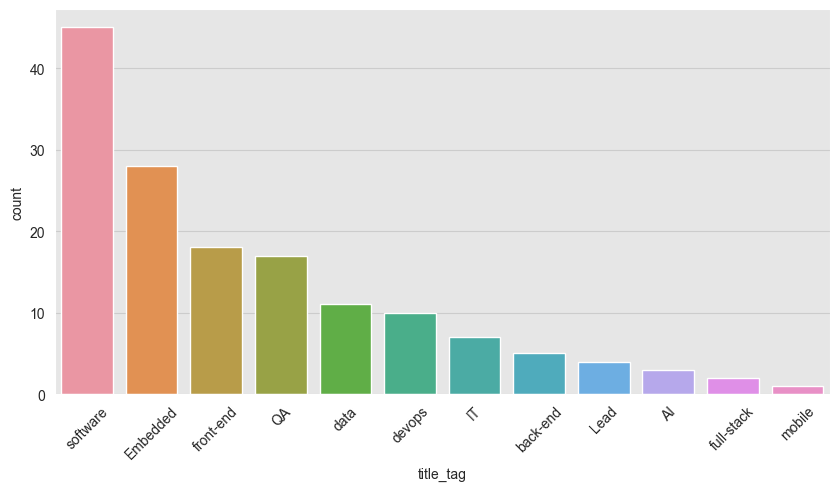

In [119]:
# create shifted_df with the concat between shifted_without_iti_df and shifted_with_iti_df 
shifted_df = pd.concat([shifted_without_iti_df, shifted_with_iti_df])

print(shifted_df['title_tag'].value_counts())
# vis title tag
plt.figure(figsize=(10, 5))
sns.countplot(x='title_tag', data=shifted_df, order=shifted_df['title_tag'].value_counts().index)
plt.xticks(rotation=45)
plt.show()


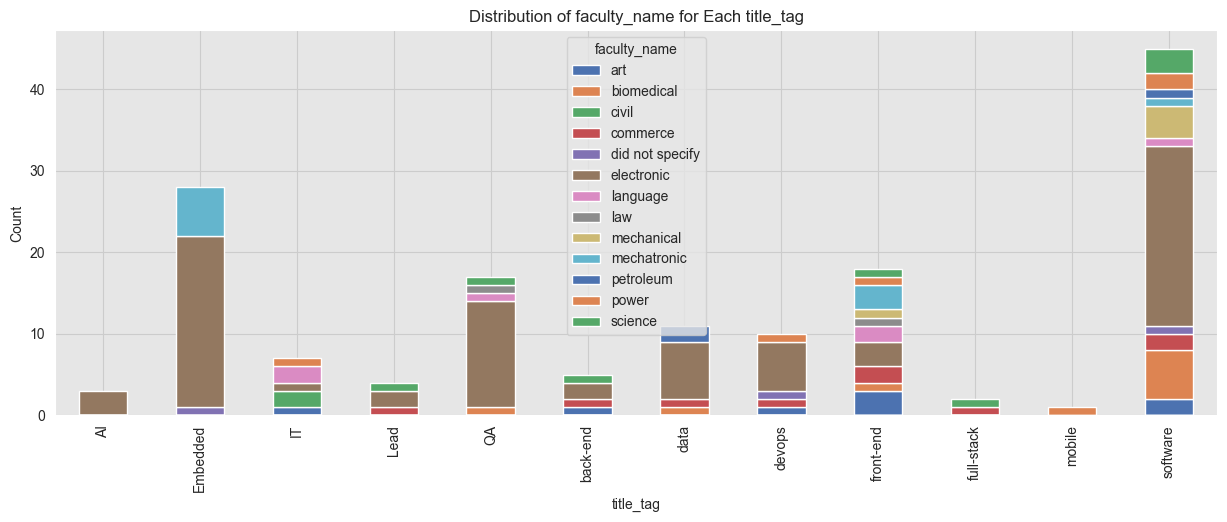

In [120]:
# Draw a stack plot to show the percentage each faculty_name and title_tag for the shifted_df
segment_counts = shifted_df.groupby(['title_tag', 'faculty_name']).size().unstack()
# drop the did not specify column
# segment_counts = segment_counts.drop('did not specify', axis=1)
segment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))
plt.xlabel('title_tag')
plt.ylabel('Count')
plt.title('Distribution of faculty_name for Each title_tag')
plt.legend(title='faculty_name')
plt.show()



## Get the people working in SW with & without ITI

working_with_iti_df (143, 15)
computer           94
electronic         21
art                 7
science             4
mechatronic         4
did not specify     3
petroleum           2
biomedical          2
power               2
language            1
engineering         1
mechanical          1
civil               1
Name: faculty_name, dtype: int64


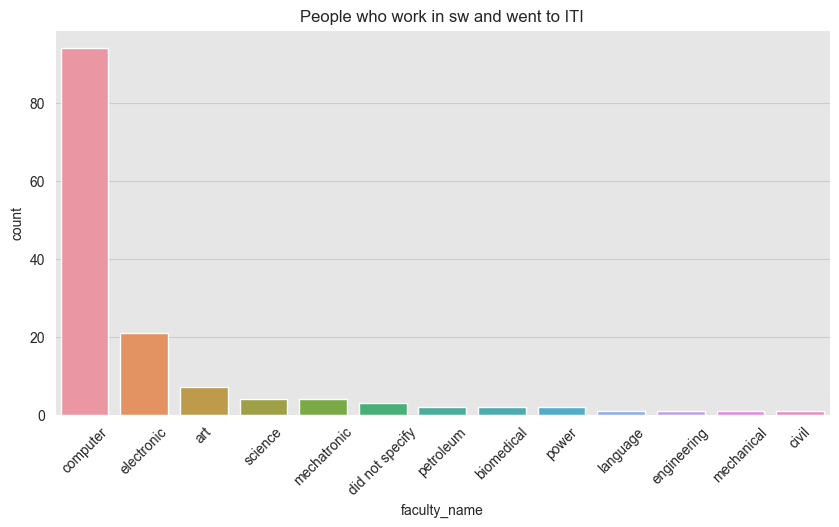

working_without_iti_df (572, 15)
computer       456
electronic      63
commerce         9
mechatronic      7
engineering      7
biomedical       7
language         5
power            4
science          4
mechanical       4
law              2
civil            2
petroleum        1
art              1
Name: faculty_name, dtype: int64


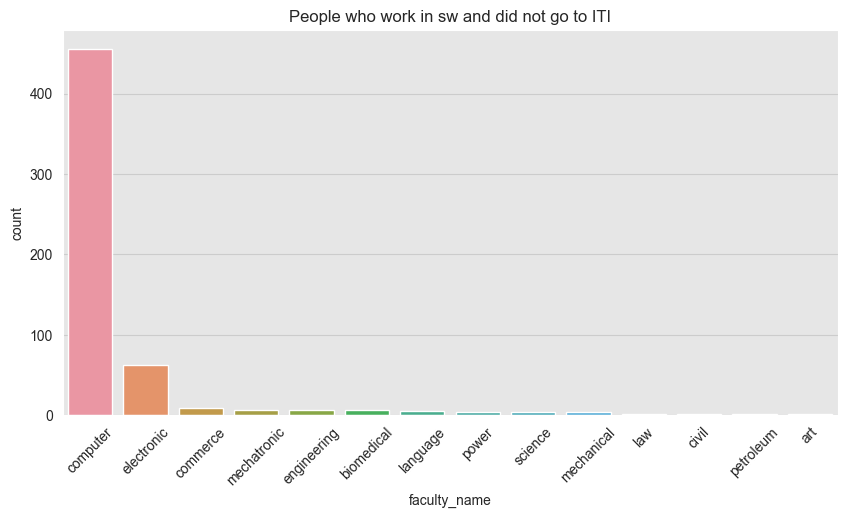

In [121]:
# Get the people who work in sw and went to ITI
print("working_with_iti_df", working_with_iti_df.shape)
print(working_with_iti_df['faculty_name'].value_counts())
# plot People who shifted their carrier and went to ITI'
plt.figure(figsize=(10, 5))
sns.countplot(x='faculty_name', data=working_with_iti_df, order=working_with_iti_df['faculty_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('People who work in sw and went to ITI')
plt.show()

# Get the people who work in sw and did not go to ITI
print("working_without_iti_df", working_without_iti_df.shape)
print(working_without_iti_df['faculty_name'].value_counts())
# plot People who shifted their carrier and did not go to ITI
plt.figure(figsize=(10, 5))
sns.countplot(x='faculty_name', data=working_without_iti_df, order=working_without_iti_df['faculty_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('People who work in sw and did not go to ITI')
plt.show()
